# Librairies

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'


from functions import *

import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
df = pd.read_csv("/Users/mikae/OneDrive/Documents/Formation/Data Scientist/Projet_6/Flipkart/flipkart_com-ecommerce_sample_1050.csv")

## Structure

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [39]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [40]:
df.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

A première vue il n'y a pas de doublons dans les données

## NaN and duplicated

In [41]:
df.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [42]:
df.isna().mean().sort_values()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
retail_price               0.000952
discounted_price           0.000952
product_specifications     0.000952
brand                      0.321905
dtype: float64

In [43]:
for col in df.columns : 
    n = df.duplicated(subset = col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : uniq_id -> duplicated : 0
col : crawl_timestamp -> duplicated : 901
col : product_url -> duplicated : 0
col : product_name -> duplicated : 0
col : product_category_tree -> duplicated : 408
col : pid -> duplicated : 0
col : retail_price -> duplicated : 695
col : discounted_price -> duplicated : 625
col : image -> duplicated : 0
col : is_FK_Advantage_product -> duplicated : 1048
col : description -> duplicated : 0
col : product_rating -> duplicated : 1023
col : overall_rating -> duplicated : 1023
col : brand -> duplicated : 559
col : product_specifications -> duplicated : 65


Il y a 408 arbres de catégories différents pour 1050 produits  
Toutes les images sont uniques  
Toutes les descriptions sont uniques 

# Data inspection

In [44]:
df.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


In [45]:
df.describe(include = object)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1050,1050,1050,1050,712,1049
unique,1050,149,1050,1050,642,1050,1050,1050,27,27,490,984
top,55b85ea15a1536d46b7190ad6fff8ce7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",CRNEG7BKMFFYHQ8Z,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,1,1,889,889,11,22


# Cleaning

## Select columns

Pour ce projet de catégorisation nous garderons :  
    - L'id pour retrouver les produits  
    - le product name qui pourra nous servir    
    - l'abre de catégorie pour analyser la catégorie du produit  
    - la description pour l'automatisation de la catégorie  
    - la marque

In [46]:
cols = ["uniq_id", "product_name", "product_category_tree", "description","brand"]
df = df[cols]

In [47]:
df.head()

,uniq_id,product_name,product_category_tree,description,brand
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,Elegance
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...,Eurospa
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print


In [48]:
df.isna().sum()

uniq_id                    0
product_name               0
product_category_tree      0
description                0
brand                    338
dtype: int64

# EDA

        ----------------------- product_name ---------------------


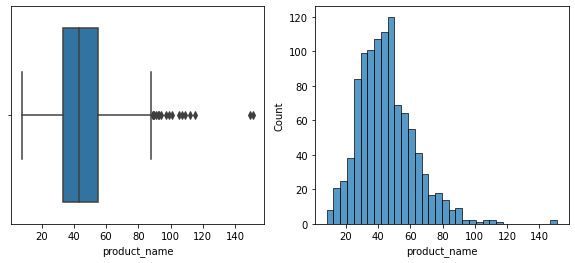


        ----------------------- product_category_tree ---------------------


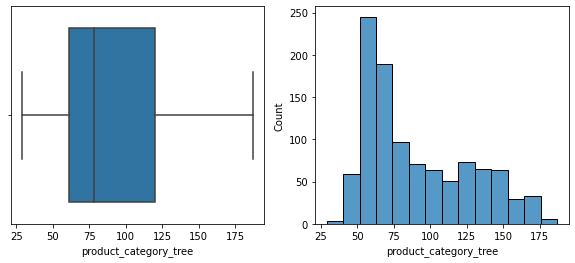


        ----------------------- description ---------------------


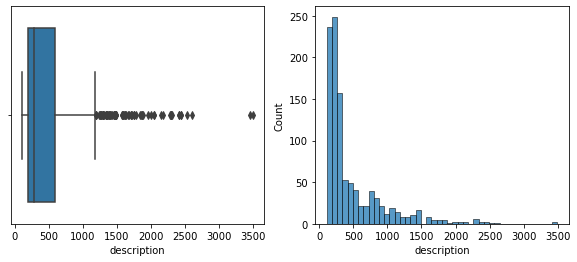


        ----------------------- brand ---------------------


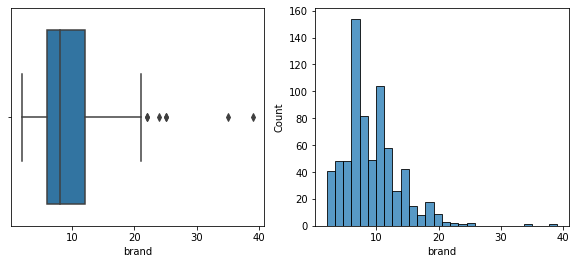

In [49]:
cols = ["product_name", "product_category_tree", "description", "brand"]
for col in cols :
    print("\033[1m"f"        ----------------------- {col} ---------------------")
    tmp = df[col].str.len()
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    sns.boxplot(ax=ax[0], x=tmp)
    sns.histplot(ax=ax[1], x=tmp)
    plt.show()
    print("")

La majorité des descriptions font moins de 500 charactères mais peuvent aller jusqu'à 3500 charactères

In [50]:
df["brand"]= df["brand"].astype(str)


## Product_name

## Explore corpus and documents

In [51]:
df_samp = df.sample(10)
df_samp

,uniq_id,product_name,product_category_tree,description,brand
304,95cb9561009bd6707c67f05e6a00c16e,Homedesires Showpiece - 10.5 cm,"[""Home Decor & Festive Needs >> Showpieces >> ...",Buy Homedesires Showpiece - 10.5 cm for Rs.3...,Homedesires
392,d376da2235096f74600d842b6f5f2d1a,"Wild Stone Drift,Wave Combo Set","[""Beauty and Personal Care >> Fragrances >> De...","Flipkart.com: Buy Wild Stone Drift,Wave Combo ...",nan
867,2c8912b849cf73676d025aa99203b6d1,Lula Baby Girl's Dark Blue Bodysuit,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",Key Features of Lula Baby Girl's Dark Blue Bod...,Lula
56,24e85c590481a7cedfe66597f253f2b2,Borse N16 Make Up And Jewellery Vanity Case,"[""Beauty and Personal Care >> Makeup >> Vanity...",Buy Borse N16 Make Up And Jewellery Vanity Cas...,nan
201,9c4ab8ab059c912090c83cb0818e7f1c,Lal Haveli Rajasthani Wooden Crafted Unique Ch...,"[""Home Decor & Festive Needs >> Showpieces >> ...",Buy Lal Haveli Rajasthani Wooden Crafted Uniqu...,Lal Haveli
673,c997312abfa36281d41366cb4a3b908e,VRCT 5 W LED Bulb,"[""Kitchen & Dining >> Lighting >> Bulbs >> VRC...",Buy VRCT 5 W LED Bulb for Rs.259 online. VRCT ...,VRCT
529,c8c7385b1b9589f009aa836f0590e646,Times 317TMS317 Party-Wedding Analog Watch - ...,"[""Watches >> Wrist Watches >> Times Wrist Watc...",Times 317TMS317 Party-Wedding Analog Watch - ...,nan
585,a70ea60f971825b2eb57261029f317ec,Flippd FDRBB1614 Fibre Analog Watch - For Men,"[""Watches >> Wrist Watches >> Flippd Wrist Wat...",Flippd FDRBB1614 Fibre Analog Watch - For Men...,nan
139,06749cbff1487f470438823f6952cfd1,Prithish Hop Jump Skip Black Ceramic Mug,"[""Kitchen & Dining >> Coffee Mugs >> Prithish ...",Prithish Hop Jump Skip Black Ceramic Mug (330 ...,nan
59,0abfcbe0e17dd50c4cf5fb1d6037d514,Brillare Science Dandruff Control Shampoo & In...,"[""Beauty and Personal Care >> Combos and Kits ...",Specifications of Brillare Science Dandruff Co...,Brillare Science


Regardons à quoi correspondent plusieurs articles dans différentes catégories

In [52]:
for idx, ser in df_samp.iterrows() :
    print("Product category : "+ser["product_category_tree"]+ "\n")
    print("Product name : "+ser["product_name"] + "\n")
    print("brand : "+ser["brand"] + "\n")
    print(ser["description"] + "..." + "\n")
    print("-----------------------------------------")

Product category : ["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Homedesires Ethnic"]

Product name : Homedesires Showpiece  -  10.5 cm

brand : Homedesires

Buy Homedesires Showpiece  -  10.5 cm for Rs.340 online. Homedesires Showpiece  -  10.5 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee....

-----------------------------------------
Product category : ["Beauty and Personal Care >> Fragrances >> Deodorants >> Combos >> Wild Stone Combos"]

Product name : Wild Stone Drift,Wave Combo Set

brand : nan

Flipkart.com: Buy Wild Stone Drift,Wave Combo Set online only for Rs. 355 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!...

-----------------------------------------
Product category : ["Baby Care >> Infant Wear >> Baby Girls' Clothes >> Bodysuits & Sleepsuits >> Bodysuits >> Lula Bodysuits >> Lula Baby Girl's Dark Blue Bodysuit"]

Product name : Lula Baby G

La description comporte dans tous ces exemples le nom du produit, il ne sera donc pas utile

## Brands

In [60]:
# keep a list of the brands tokens
brands_list = df["brand"].unique().tolist()
brands_list = [x.lower().split() for x in brands_list]
brands_list = [x for sublist in brands_list for x in sublist]

brands[:10]

brands    [elegance, sathiyas, eurospa, santosh, royal, ...
dtype: object

In [61]:
import pickle
l = brands_list
with open("brands", "wb") as fp:   #Pickling
    pickle.dump(l, fp)

In [62]:
df_category = df[["product_category_tree"]]

In [63]:
df_category_2 = all_categories(df, "product_category_tree", 2, df_category)

In [64]:
df_category_2.head(5)

,product_category_tree,categ_0,categ_1
0,"[""Home Furnishing >> Curtains & Accessories >>...",home furnishing,curtains accessories
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",baby care,baby bath skin
2,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",baby care,baby bath skin
3,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",home furnishing,bed linen
4,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",home furnishing,bed linen


In [65]:
data_T = df[["description"]]

Extraction du premier niveau de l'arbre de catégorie

In [66]:
data_T = all_categories(df, "product_category_tree", 1, data_T)

In [67]:
data_T.head(5)

,description,categ_0
0,Key Features of Elegance Polyester Multicolor ...,home furnishing
1,Specifications of Sathiyas Cotton Bath Towel (...,baby care
2,Key Features of Eurospa Cotton Terry Face Towe...,baby care
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,home furnishing
4,Key Features of Jaipur Print Cotton Floral Kin...,home furnishing


In [68]:
data_T.to_csv("data_T.csv")